In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('5_DA Test- Linkedin Campaign Process - LinkedinMasterDataBase.csv')

In [11]:
df.head()

,Account Status,Company Name,Name,Personal Linkedin,Website,Company Linkedin,Designation,Linkedin Status,linkedin account,Date,Linkedin Invite,Date.1,Sequence 1,Date.2,Sequence 2,Date.3,Sequence 3,Date.4,Sequence 4,Date.5
0,Inactive,13SQFT,Alok Bansal,http://www.linkedin.com/in/alok-bansal-87162637,http://www.13sqft.com/,NaN,Founder,Reply - Intrested - Sequence Stop,Saranya,19-Aug-2024,Done,Stop,stop,stop,stop,stop,stop,stop,stop,NaN
1,Active,1K,Abhishek Halder,http://www.linkedin.com/in/halderabhishek,http://www.niyotail.com,NaN,Founder,Started - Linkedin Sequence,Kr,26-Sep-2024,Done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Active,1K,Sachin Sharma,http://www.linkedin.com/in/sachin-sharma-7b11a515,http://www.niyotail.com,NaN,Founder,Started - Linkedin Sequence,Kr,26-Sep-2024,Done,27-Sep-2024,Done,30-Sep-2024,Done,2-Oct-2024,Done,7-Oct-2024,Done,NaN
3,Active,2070 Health,Pankaj Jethwani,https://www.linkedin.com/in/pankajsj/,NaN,NaN,Chief Executive Officer,Started - Linkedin Sequence,Saranya,3-Sep-2024,Done,4-Sep-2024,Done,5-Sep-2024,Done,6-Sep-2024,Done,9-Sep-2024,Done,NaN
4,Inactive,5C Network,Kalyan Sivasailam,https://www.linkedin.com/in/kalyansivasailam/,http://www.5cnetwork.com/,NaN,Co Founder,Moved to Better India,Saranya,27-Aug-2024,Done,29-Aug-2024,Done,2-Sep-2024,Done,3-Sep-2024,Done,5-Sep-2024,Done,NaN


In [15]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

### Data Cleaning and Handling

In [17]:
# Convert all column names to lowercase and replace spaces with underscores for consistency
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Handling missing values:
# - Drop rows where 'company_name' or 'name' is missing (key identifiers)
df.dropna(subset=['company_name', 'name'], inplace=True)

# Convert date columns to datetime format (handling errors gracefully)
date_columns = [col for col in df.columns if "date" in col]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Assuming day-first format

# Standardize categorical values in 'account_status' and 'linkedin_status'
df['account_status'] = df['account_status'].str.strip().str.capitalize()
df['linkedin_status'] = df['linkedin_status'].str.strip().str.lower()

# Remove duplicate entries based on 'name' and 'company_name'
df.drop_duplicates(subset=['name', 'company_name'], keep='first', inplace=True)

# Display cleaned dataset summary
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6584 entries, 0 to 6722
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   account_status     6584 non-null   object        
 1   company_name       6584 non-null   object        
 2   name               6584 non-null   object        
 3   personal_linkedin  6557 non-null   object        
 4   website            5453 non-null   object        
 5   company_linkedin   4134 non-null   object        
 6   designation        6547 non-null   object        
 7   linkedin_status    4968 non-null   object        
 8   linkedin_account_  4920 non-null   object        
 9   date               4542 non-null   datetime64[ns]
 10  linkedin_invite    4773 non-null   object        
 11  date.1             1290 non-null   datetime64[ns]
 12  sequence_1         2285 non-null   object        
 13  date.2             741 non-null    datetime64[ns]
 14  sequence_2   

(None,
   account_status company_name               name  \
 0       Inactive       13SQFT        Alok Bansal   
 1         Active           1K    Abhishek Halder   
 2         Active           1K      Sachin Sharma   
 3         Active  2070 Health    Pankaj Jethwani   
 4       Inactive   5C Network  Kalyan Sivasailam   
 
                                    personal_linkedin  \
 0    http://www.linkedin.com/in/alok-bansal-87162637   
 1          http://www.linkedin.com/in/halderabhishek   
 2  http://www.linkedin.com/in/sachin-sharma-7b11a515   
 3              https://www.linkedin.com/in/pankajsj/   
 4      https://www.linkedin.com/in/kalyansivasailam/   
 
                      website company_linkedin              designation  \
 0     http://www.13sqft.com/              NaN                  Founder   
 1    http://www.niyotail.com              NaN                  Founder   
 2    http://www.niyotail.com              NaN                  Founder   
 3                        NaN

### Data Visualization

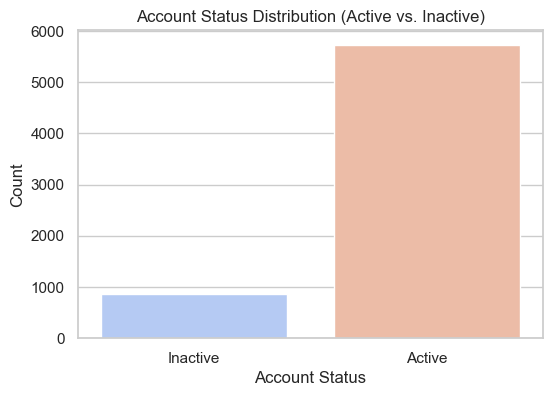

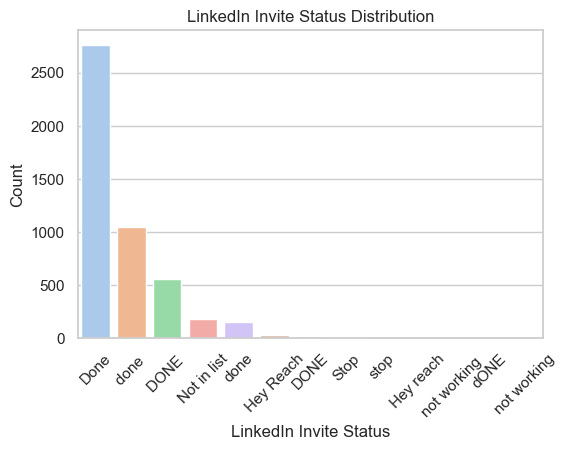

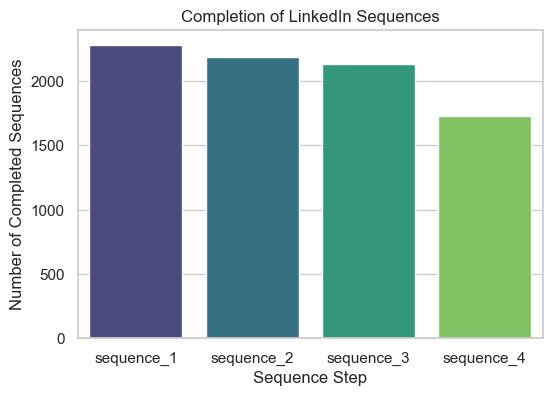

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_theme(style="whitegrid")

# Plot: Active vs. Inactive Accounts
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="account_status", palette="coolwarm")
plt.title("Account Status Distribution (Active vs. Inactive)")
plt.xlabel("Account Status")
plt.ylabel("Count")
plt.show()

# Plot: LinkedIn Invite Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="linkedin_invite", palette="pastel", order=df["linkedin_invite"].value_counts().index)
plt.title("LinkedIn Invite Status Distribution")
plt.xlabel("LinkedIn Invite Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot: Completion of Sequences
sequence_columns = ["sequence_1", "sequence_2", "sequence_3", "sequence_4"]
sequence_counts = df[sequence_columns].notna().sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=sequence_counts.index, y=sequence_counts.values, palette="viridis")
plt.title("Completion of LinkedIn Sequences")
plt.xlabel("Sequence Step")
plt.ylabel("Number of Completed Sequences")
plt.show()
